# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: Ángel Marcos García
*   Alumno 2: Vicente Mendoza Afonso
*   Alumno 3: Julio Moreno Blanco
*   Alumno 4: Juan Antonio Ortega Vera






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [ ]:
# # ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
# mount='/content/gdrive'
# drive_root = mount + "/My Drive/VIU/Trabajo_aprendizaje_por_refuerzo"

# try:
#   from google.colab import drive
#   IN_COLAB=True
# except:
#   IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [ ]:
# # Switch to the directory on the Google Drive that you want to use
# import os
# if IN_COLAB:
#   print("We're running Colab")

#   if IN_COLAB:
#     # Mount the Google Drive at mount
#     print("Colab: mounting Google drive on ", mount)

#     drive.mount(mount)

#     # Create drive_root if it doesn't exist
#     create_drive_root = True
#     if create_drive_root:
#       print("\nColab: making sure ", drive_root, " exists.")
#       os.makedirs(drive_root, exist_ok=True)

#     # Change to the directory
#     print("\nColab: Changing directory to ", drive_root)
#     %cd $drive_root
# # Verify we're in the correct working directory
# %pwd
# print("Archivos en el directorio: ")
# print(os.listdir())

---
### 1.4. Instalar librerías necesarias

In [ ]:
# if IN_COLAB:
#   %pip install gym==0.17.3
#   %pip install git+https://github.com/Kojoley/atari-py.git
#   %pip install keras-rl2==1.0.5
#   %pip install tensorflow==2.8
# else:
#   %pip install gym==0.17.3
#   %pip install git+https://github.com/Kojoley/atari-py.git
#   %pip install pyglet==1.5.0
#   %pip install h5py==3.1.0
#   %pip install Pillow==9.5.0
#   %pip install keras-rl2==1.0.5
#   %pip install Keras==2.2.4
#   %pip install tensorflow==2.5.3
#   %pip install torch==2.0.1
#   %pip install agents==1.4.0
#   %pip install matplotlib==3.6

In [ ]:
# !pip install opencv-python==4.10.0.82
# !pip install pydot==2.0.0
# !pip install graphviz==0.20.3

---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [36]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute, InputLayer, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

# import matplotlib.pyplot as plt
# import cv2
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback
import math
from collections import deque
import csv
from gym import wrappers
import io
import base64
from IPython.display import HTML
#from tensorflow.keras.callbacks import History

import os
import time

#### Configuración base

In [ ]:
# Hiperparametros de la observación del modelo
INPUT_SHAPE = (84, 84)        # Tamaño de la imagen de observación
WINDOW_LENGTH = 4             # Numero de observaciones tomadas como entrada

# Hiperparametros de la red
LEARNING_RATE = 0.0001

# Hiperparametros del agente
GAMMA = 0.99                  # Factor de descuento para las recompensas futuras. Controla cuánto peso se le da a las recompensas futuras en comparación con las inmediatas
TARGET_MODEL_UPDATE = 10000   # Frecuencia con la que se actualiza el modelo objetivo
TRAIN_INTERVAL = 24           # determina cada cuántos pasos se entrena la red
DELTA_CLIP = 1.0              # Valor utilizado para recortar los errores TD (diferencia temporal) durante el entrenamiento para evitar fluctuaciones extremas


In [ ]:
# si pasa algo extraño, y no pilla la GPU, ejecutar estos comandos en la terminal 

# pip install --upgrade ipykernel
# python -m ipykernel install --user --name gym4 --display-name "Python (gym4)"

### Comprobación que hay GPU

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Nombre de experimento y creación carpetas

In [9]:
path = 'experimento_3'

# Define subdirectorios
videos_path = os.path.join(path, 'videos')
modelos_path = os.path.join(path, 'modelos')

# Crear directorios si no existen
os.makedirs(videos_path, exist_ok=True)
os.makedirs(modelos_path, exist_ok=True)

Guardamos la configuración de nuestro experimento:

In [10]:
hyperparameters = {
    "INPUT_SHAPE": INPUT_SHAPE,
    "WINDOW_LENGTH": WINDOW_LENGTH,
    "LEARNING_RATE": LEARNING_RATE,
    "GAMMA": GAMMA,
    "TARGET_MODEL_UPDATE": TARGET_MODEL_UPDATE,
    "TRAIN_INTERVAL": TRAIN_INTERVAL,
    "DELTA_CLIP": DELTA_CLIP
}

# Nombre del archivo CSV
csv_file = 'hiperparametros.csv'

# Escribir los hiperparámetros en el archivo CSV
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Nombre', 'Valor'])
    for key, value in hyperparameters.items():
        writer.writerow([key, value])

In [11]:
env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [ ]:
print("Numero de acciones disponibles es de: " + str(nb_actions))

Numero de acciones disponibles es de: 6


Podemos ver en la documentación que estas acciones se corresponden con:
| Value | Meaning | Value | Meaning     | Value | Meaning    |
| ----- | ------- | ----- | ----------- | ----- | ---------- |
|  0    |  NOOP   |  1    |  FIRE       |  2    |  RIGHT     |
|  3    |  LEFT   |  4    |  RIGHTFIRE  |  5    |  LEFTFIRE  |

In [12]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

In [8]:
print("Formato de las observaciones:")
env.observation_space

Formato de las observaciones:


Box(0, 255, (210, 160, 3), uint8)

Lo que nos indica que las observaciones son imágenes RGB de 210, 160 con valores de intensidad de pixel entre 0 y 255

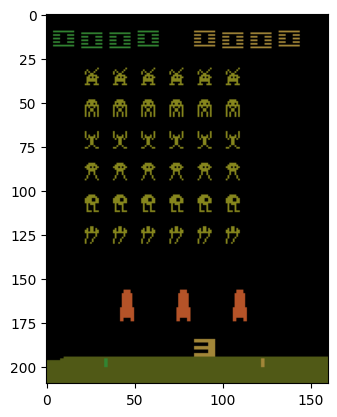

In [14]:
obs = env.reset()
plt.imshow(obs)
plt.show()

Mediante la siguiente funcion hacemos uns transformacion de la observacion a una escala mas reducida y reduciondo el espectro de color a escala de grises, así reduciremos la carga computacional del algoritmo.

In [15]:
def preprocess_observation(obs):
    # Convertir a escala de grises
    gray = cv2.cvtColor(obs, cv2.COLOR_RGB2GRAY)
    # Redimensionar la imagen a (84, 84)
    resized = cv2.resize(gray, (INPUT_SHAPE), interpolation=cv2.INTER_AREA)
    # Normalizar la imagen (opcional)
    normalized = resized / 255.0
    # Añadir una dimensión para el canal
    processed_obs = np.expand_dims(normalized, axis=-1)
    return processed_obs

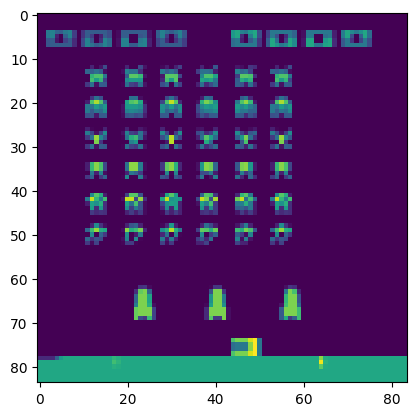

In [16]:
processed_obs = preprocess_observation(obs)
plt.imshow(processed_obs)
plt.show()

#### 1. Implementación de la red neuronal

In [13]:
def create_dqn_model(input_shape, num_actions):
    model = Sequential()
    
    # Input layer: process input shape
    model.add(InputLayer(input_shape=(input_shape[0], input_shape[1], input_shape[2]))) #(84, 84, 1)

    # Permute layer to reorganize dimensions from (height, width, channels*4) to (channels*4, height, width)
    model.add(Permute((2, 3, 1)))
    
    # Convolutional layers with max pooling
    model.add(Conv2D(32, (8, 8), strides=4, activation='relu'))
    #model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (4, 4), strides=2, activation='relu'))
    #model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), strides=1, activation='relu'))
    
    # Flattening layer
    model.add(Flatten())
    
    # Fully connected (Dense) layers
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_actions, activation='linear'))
    
    return model

In [ ]:
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
num_actions = nb_actions # 6 - es el número de acciones posibles en Space Invaders

model = create_dqn_model(input_shape, num_actions)

Resumen de nuestro modelo:

In [11]:
print("El esquema del modelo es:\n")
model.summary()

El esquema del modelo es:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute (Permute)            (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 20, 20, 32)        8224      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1606144   
_________________________________________________________________
dense_1 (Dense)              

Podemos ver una representación gráfica del modelo:

In [12]:
plot_model(model,show_shapes=True, dpi=80)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


#### 2. Implementación de la solución DQN

Configuramos la memoria del modelo:

In [15]:
memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)

Instancimos el método para procesar las observaciones:

In [16]:
processor = AtariProcessor()

Definimos la estrategia que vamos a seguir de las posibles que implementa [keras](https://github.com/keras-rl/keras-rl/blob/master/rl/policy.py):


- **LinearAnnealedPolicy** </br>
  Es una política ε-Greedy donde ε disminuye linealmente a lo largo del tiempo.

In [17]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1.0, value_min=0.1, value_test=0.05, nb_steps=1000000)

- **SoftmaxPolicy** </br>
    Selecciona acciones basadas en una distribución de probabilidad generada por una función softmax aplicada a los valores Q.

In [25]:
# policy = SoftmaxPolicy()

- **EpsGreedyQPolicy** </br>
    Selecciona la acción con el valor Q más alto con probabilidad 1-ε y una acción aleatoria con probabilidad ε.

In [26]:
# policy = EpsGreedyQPolicy(eps=0.1)

- **GreedyQPolicy** </br>
    Siempre selecciona la acción con el valor Q más alto.

In [27]:
# policy = GreedyQPolicy()

- **BoltzmannQPolicy** </br>
    Selecciona acciones basadas en una distribución de probabilidad generada por la función Boltzmann aplicada a los valores Q.

In [28]:
# policy = BoltzmannQPolicy(tau=1.0)

- **MaxBoltzmannQPolicy** </br>
    Combina Boltzmann y ε-Greedy, seleccionando con probabilidad 1-ε la acción Boltzmann y con probabilidad ε una acción aleatoria.

In [29]:
# policy = MaxBoltzmannQPolicy(eps=0.1, tau=1.0)

- **BoltzmannGumbelQPolicy** </br>
    Utiliza la distribución de Gumbel para generar una política Boltzmann mejorada.

In [30]:
# policy = BoltzmannGumbelQPolicy(C=1.0)

Definimos el agente:

In [ ]:
dqn = DQNAgent(
    model=model,
    nb_actions=num_actions,
    policy=policy,
    memory=memory,
    processor=processor,
    nb_steps_warmup = 50000, # indica cuántos pasos (interacciones con el entorno) el agente debe ejecutar antes de comenzar a entrenar el modelo
    gamma=GAMMA,
    target_model_update = TARGET_MODEL_UPDATE,
    train_interval = TRAIN_INTERVAL,
    delta_clip = DELTA_CLIP
)

optimizer = Adam(learning_rate = LEARNING_RATE)
dqn.compile(optimizer=optimizer, metrics=['mae'])

Definimos un Callbak para poder guardar los mejores pesos cada 20 iteraciones 

In [19]:
class SaveBestWeights(Callback):
    def __init__(self, filepath, interval=20, overwrite=True):
        super(SaveBestWeights, self).__init__()
        self.filepath = filepath
        self.interval = interval
        self.best_reward = -float('inf')
        self.overwrite = overwrite
    
    def on_episode_end(self, episode, logs={}):
        if episode % self.interval == 0:
            current_reward = logs.get('episode_reward')
            if current_reward > self.best_reward:
                self.best_reward = current_reward
                #self.model.save_weights(self.filepath)
                #print(f'Pesos guardados en {self.filepath} recompensa: {self.best_reward}')
                if self.overwrite or not os.path.exists(self.filepath):
                    self.model.save_weights(self.filepath, overwrite=True)
                    print(f'Pesos guardados en {self.filepath} recompensa: {self.best_reward}')
                else:
                    print(f'Warning: No se sobrescribió {self.filepath}, ya existe.')


In [20]:
# filepath = 'dqn_best_weights.h5'

filepath = os.path.join(modelos_path, 'dqn_best_weights.h5')
save_best_weights = SaveBestWeights(filepath=filepath, interval=20, overwrite=True)

Definimos un Callbak para poder guardar los ultimos pesos cada 10 iteraciones, sin importar si mejoró el resultado del modelo 

In [21]:
class SaveLastWeights(Callback):
    def __init__(self, filepath, interval=10):
        super(SaveLastWeights, self).__init__()
        self.filepath = filepath
        self.interval = interval
    
    def on_episode_end(self, episode, logs={}):
        if episode % self.interval == 0:
            self.model.save_weights(self.filepath, overwrite=True)
            print(f'Pesos guardados en {self.filepath} al final del episodio {episode}')

In [22]:
# filepathlw = 'dqn_last_weights.h5'

filepathlw = os.path.join(modelos_path, 'dqn_last_weights.h5')
save_last_weights = SaveLastWeights(filepath=filepathlw, interval=10)

Definimos un Callbak para obtener las métricas de entrenamiento **por episodio**

In [23]:
class MetricsLogger(Callback):
    def __init__(self, filepath):
        self.filepath = filepath
        with open(self.filepath, mode='w') as file:
            writer = csv.writer(file)
            writer.writerow(['episode', 'reward', 'steps'])

    def on_episode_end(self, episode, logs={}):
        reward = logs.get('episode_reward')
        steps = logs.get('nb_episode_steps')
        
        with open(self.filepath, mode='a') as file:
            writer = csv.writer(file)
            writer.writerow([episode, reward, steps])

In [24]:
# metrics_logger = MetricsLogger('training_metrics.csv')
filepathTM = os.path.join(modelos_path, 'training_metrics.csv')
metrics_logger = MetricsLogger(filepathTM)

Definimos un Callbak para detener el entrenamiento cuando la recompensa media supere un umbral n veces

In [25]:
class EarlyStoppingByReward(Callback):
    def __init__(self, reward_threshold, patience):
        super(EarlyStoppingByReward, self).__init__()
        self.reward_threshold = reward_threshold
        self.patience = patience
        self.recent_rewards = deque(maxlen=patience)
    
    def on_episode_end(self, episode, logs={}):
        current_reward = logs.get('episode_reward')
        self.recent_rewards.append(current_reward)
        
        if len(self.recent_rewards) == self.patience and all(r > self.reward_threshold for r in self.recent_rewards):
            self.model.stop_training = True
            print(f'Detener el entrenamiento al exceder la recompensa media {self.reward_threshold} en {self.patience} episodios')


In [26]:
early_stopping = EarlyStoppingByReward(reward_threshold=20, patience=10)

Definimos un fichero para guardar las métricas

In [27]:
# log_filename = 'dqn_{}_log.json'.format(env_name)
log_filename = os.path.join(modelos_path, f'dqn_{env_name}_log.json')

Antes de entrenar, comprobamos si tenemos un fichero de pesos anterior y si existe lo cargamos

In [28]:
if os.path.exists(filepathlw):
    print(f'Cargamos los pesos de {filepathlw}')
    dqn.load_weights(filepathlw)
else:
    print('No hay un fichero de pesos anterior, entrenando la red desde cero')

No hay un fichero de pesos anterior, entrenando la red desde cero


## Definición de parámetros para el entrenamiento

In [ ]:
nb_steps_param = 1000000
verbose_param = 2
log_interval_param = 10000

In [ ]:
start_time = time.time()

#dqn.fit(env, nb_steps=1000000, visualize=False, verbose=2, callbacks=[save_best_weights, early_stopping])
train_scores = dqn.fit(env, nb_steps=nb_steps_param, visualize=False, verbose=verbose_param, log_interval=log_interval_param, 
                       callbacks=[save_best_weights, save_last_weights, metrics_logger, early_stopping, FileLogger(log_filename, interval=100)])

end_time = time.time()
training_duration = end_time - start_time

print(f"Entrenamiento completado en {training_duration:.2f} segundos ({training_duration/60:.2f} minutos)")


Training for 10000 steps ...
done, took 3.931 seconds


## Testeo del modelo

In [31]:
from gym import wrappers
import io
import base64
from IPython.display import HTML

In [32]:
# env = wrappers.Monitor(env, "./Videos", force=True) # Para guardar los videos de las partidas 
                                                    # necesario instalar ffmpeg

env = wrappers.Monitor(env, videos_path, force=True)


In [33]:
# Testing part to calculate the mean reward
# weights_filename = 'dqn_last_weights.h5'
weights_filename = os.path.join(modelos_path, 'dqn_last_weights.h5')
dqn.load_weights(weights_filename)
test_scores = dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 16.000, steps: 977
Episode 2: reward: 16.000, steps: 977
Episode 3: reward: 18.000, steps: 1004
Episode 4: reward: 12.000, steps: 868
Episode 5: reward: 16.000, steps: 964
Episode 6: reward: 12.000, steps: 857
Episode 7: reward: 12.000, steps: 863
Episode 8: reward: 12.000, steps: 867
Episode 9: reward: 12.000, steps: 850
Episode 10: reward: 12.000, steps: 864


Obtenemos la media y el maximo y minimo de las recompensas obtenidas

In [34]:
episode_rewards = test_scores.history['episode_reward']
print(int(np.min(episode_rewards)), "~", int(np.max(episode_rewards)), "Mean", np.mean(episode_rewards))

12 ~ 18 Mean 13.8


Podemos visualizar una partida:

In [ ]:
# video = io.open('./Videos/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()

video_path = os.path.join(videos_path, f'openaigym.video.{env.file_infix}.video000000.mp4')
video = io.open(video_path, 'r+b').read()


encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

# 3. Justificación de los parámetros seleccionados y de los resultados obtenidos

---

Definimos una funcion para graficar los resultados de las metricaws obtenidas en el entrenamiento:

In [36]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [50]:
def plot_experiments_json(experiments, fields_to_plot):
    # Colores para los experimentos
    colors = plt.cm.viridis(np.linspace(0, 1, len(experiments)))
    
    # Leer datos de los archivos json
    data = {}
    for name, path in experiments.items():
        with open(path, 'r') as f:
            data[name] = json.load(f)
    
    # Convertir los datos a DataFrame
    dfs = {name: pd.DataFrame(experiment_data) for name, experiment_data in data.items()}
    
    # Configurar subplots en función de la cantidad de campos
    n_fields = len(fields_to_plot)
    if n_fields == 6:
        fig, axs = plt.subplots(3, 2, figsize=(15, 20))
    elif n_fields == 3:
        fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    elif n_fields == 1:
        fig, axs = plt.subplots(1, 1, figsize=(15, 5))
        axs = np.array([axs])  # Convertir a array para la iteración
    
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    
    # Graficar cada campo
    for i, field in enumerate(fields_to_plot):
        ax = axs[i // 2, i % 2] if n_fields == 6 else axs[i]  # Ubicación del subplot
        for (name, df), color in zip(dfs.items(), colors):
            if field in df.columns:
                ax.plot(df[field], label=name, color=color)
        ax.set_xlabel("Timestep")
        ax.set_ylabel(field)
        ax.set_title(field)
        ax.legend()
        ax.grid(True)
    
    # Ajustar el layout y mostrar la figura
    plt.tight_layout()
    plt.show()

Hemos realizado un barrido de los hiperparámetros principales, obteniendo las curvas resultantes para cada hiperparámetro. De esta manera, podemos observar cómo y en qué grado afecta cada hiperparámetro a los resultados obtenidos.

Establecemos un experimento base para la comparación de resultados con los siguientes hiperparámetros:
| HIPERPARAMETRO      | VALOR    |
| ------------------- | -------- |
| INPUT_SHAPE         | (84, 84) |
| WINDOW_LENGTH       | 4        |
| LEARNING_RATE       | 0.00025  |
| GAMMA               | 0.99     |
| TARGET_MODEL_UPDATE | 10000    |
| TRAIN_INTERVAL      | 4        |
| DELTA_CLIP          | 1.0      |

Mantendremos fijos los hiperparámetros referentes a la observación, tanto el INPUT_SHAPE, que define el tamaño de la imagen de observación, como el WINDOW_LENGTH, que corresponde al número de observaciones tomadas como entrada. 

Inicialmente, nos preocupaba que el tamaño de la observación no tuviera la suficiente definición para representar los disparos, por lo que aplicamos la misma transformación sobre el video de salida y observamos que sí podían apreciarse.

In [54]:
video = io.open('./Video_procesado_red/video_procesado_red.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

Por otro lado, pensamos en hacer un "crop" para reducir aún más la dimensionalidad de la entrada y, por tanto, la carga de computación, pero preferimos mantener la observación entera durante todos los experimentos.

## Arquitectura de la red

Durante la realización de los experimentos, hemos partido de una arquitectura fija compuesta de tres capas convolucionales que reducen la dimensionalidad de la observación y dos capas densas para la clasificación de las acciones, haciendo un total de 1,687,206 parámetros entrenables. 

Hemos contemplado la modificación de la red, como por ejemplo, añadir alguna capa de max pooling y quitar alguna de las convoluciones para simplificar y reducir la red y observar los resultados. Sin embargo, debido a la duración de los experimentos realizados, nos ha resultado imposible estudiar cómo afecta un cambio en la estructura de la red a los resultados.

## Estrategia

Con respecto a la estrategia, hemos consultado la documentación de [keras](https://github.com/keras-rl/keras-rl/blob/master/rl/policy.py) en busca de las posibles implementaciones:
- **LinearAnnealedPolicy**: Es una política ε-Greedy donde ε disminuye linealmente a lo largo del tiempo.
- **SoftmaxPolicy**: Selecciona acciones basadas en una distribución de probabilidad generada por una función softmax aplicada a los valores Q.
- **EpsGreedyQPolicy**: Selecciona la acción con el valor Q más alto con probabilidad 1-ε y una acción aleatoria con probabilidad ε.
- **GreedyQPolicy**: Siempre selecciona la acción con el valor Q más alto.
- **BoltzmannQPolicy**: Selecciona acciones basadas en una distribución de probabilidad generada por la función Boltzmann aplicada a los valores Q.
- **MaxBoltzmannQPolicy**: Combina Boltzmann y ε-Greedy, seleccionando con probabilidad 1-ε la acción Boltzmann y con probabilidad ε una acción aleatoria.
- **BoltzmannGumbelQPolicy**: Utiliza la distribución de Gumbel para generar una política Boltzmann mejorada.

De entre todas las opciones disponibles de la librería, hemos decidido implementar la primera de ellas. Al igual que en el caso anterior, la falta de tiempo y recursos nos ha impedido poder trabajar con el resto de las opciones.

## TRAIN_INTERVAL

El primer hiperparámetro que hemos modificado ha sido el TRAIN_INTERVAL, que determina cada cuántos pasos se entrena la red. Hemos aumentado el número de pasos, lo que previsiblemente empeora el desempeño del algoritmo, pero por otro lado, aumenta la velocidad del entrenamiento considerablemente, ya que la red se actualiza de manera menos frecuente. Podemos comprobar los resultados obtenidos para ambos casos:
| TRAIN_INTERVAL     | 4                | 24               |
| ------------------ | ---------------- | ---------------- |
| puntuación de test | 8 ~ 22 Mean 13.6 | 9 ~ 24 Mean 14.5 |

Podemos ver en detalle las gráficas de "loss", "mae" y "mean_q":

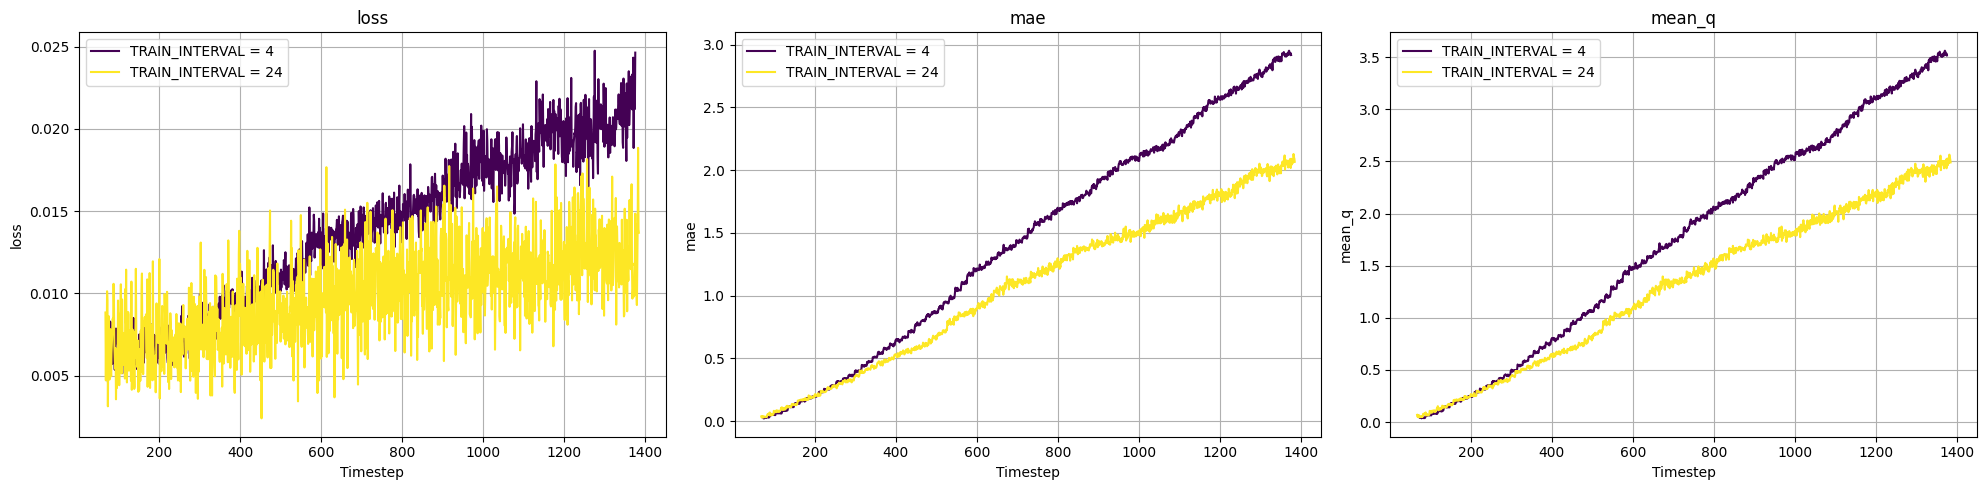

In [26]:
#fields_to_plot = ["loss", "mae", "mean_q", "episode_reward", "nb_episode_steps", "duration"]
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "TRAIN_INTERVAL = 4": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",
    "TRAIN_INTERVAL = 24": "./Experimento_01_A/dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

A raíz de los resultados obtenidos, podemos ver que no hay una gran variación de las puntuaciones obtenidas tanto en la media como en los máximos y mínimos obtenidos, lo cual es una buena indicación para realizar futuros experimentos de una manera más rápida.

Podemos observar ligeros cambios en las tendencias de las gráficas de "loss", "mae" y "mean_q", que iremos desgranando a continuación:

- **Loss**: Nos muestra cómo evoluciona el error de predicción del modelo a lo largo del entrenamiento. Es deseable que el loss se mantenga en valores bajos o con tendencia descendente, lo que indica que el modelo mejora en sus predicciones.
- **MAE**: Indica la diferencia entre la Q estimada por la red y la de la red target. El comportamiento esperable es que suba hasta un cierto valor y luego descienda, algo que no hemos llegado a ver a lo largo de los experimentos y que quizá se deba a un número insuficiente de steps para visualizar dicho cambio.
- **Mean_q**: Es el promedio de los valores Q estimados por la red neuronal para todas las acciones posibles en un estado dado. Esperamos que este valor aumente a medida que el agente aprende a estimar mejor las recompensas futuras. Por otro lado, vemos una relación directa con la función de pérdida, en nuestro caso la MAE, la cual busca minimizar la diferencia entre los valores de Q predichos y los valores Q de la red objetivo.

Por lo general, durante los experimentos realizados, observamos un loss ligeramente superior en los valores que usan un TRAIN_INTERVAL de 4 con respecto a los de 24, lo que indica un mejor desempeño del modelo. Por otro lado, observamos un mean_q más bajo para los experimentos con un TRAIN_INTERVAL de 24, lo que quiere decir que el modelo previsiblemente tendría un desempeño algo peor. Si nos damos cuenta, ambos hechos se compensan de cierta manera, haciendo que el resultado de ambos experimentos sea similar.

También podemos observar que tanto el "episode_reward", "nb_episode_steps" y la "duration" se mantienen inestables durante todo el proceso. Este fenómeno se repite a lo largo de todos los experimentos realizados, independientemente de la duración de los mismos, algo que choca con la intuición que teníamos a priori, ya que esperábamos que estos valores tendieran a una cierta estabilidad si aumentábamos el entrenamiento. Por otro lado, observamos un único cambio en la duración, reduciéndola drásticamente pero manteniendo esa inestabilidad.

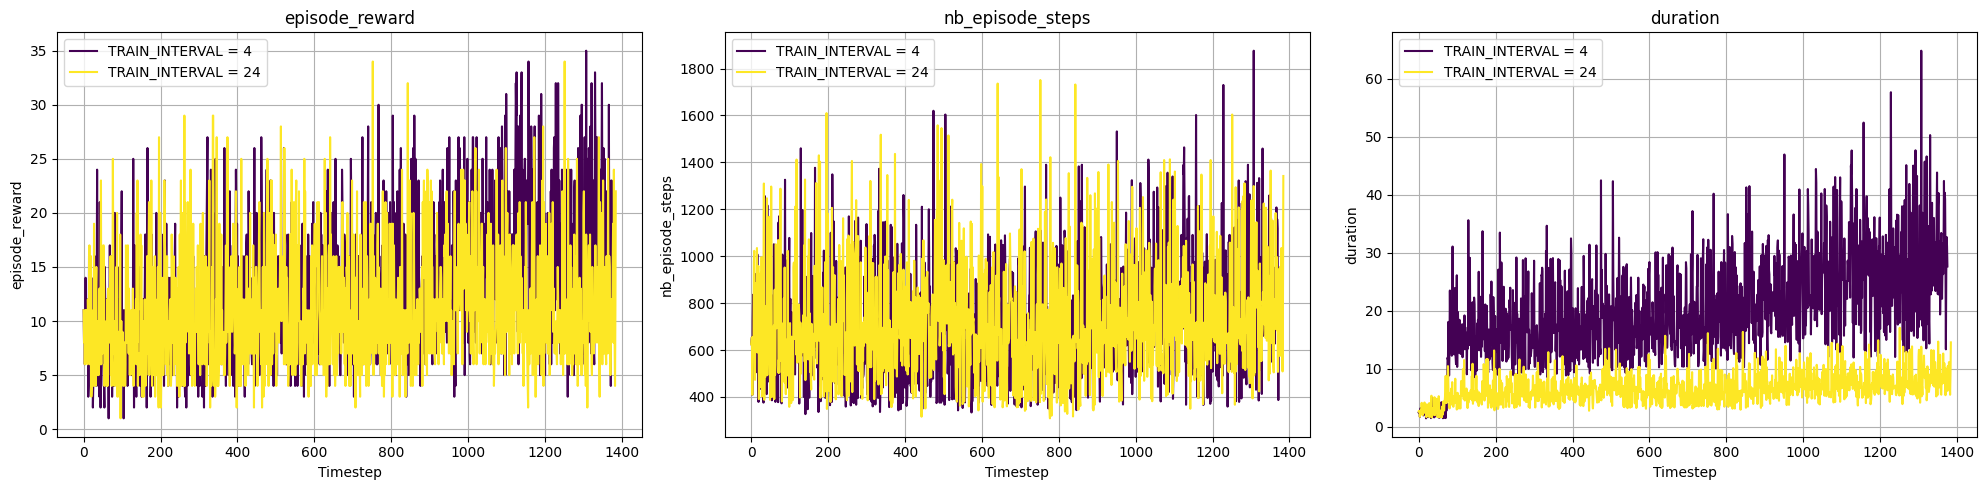

In [27]:
fields_to_plot = ["episode_reward", "nb_episode_steps", "duration"]
experiments = {
    "TRAIN_INTERVAL = 4": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",
    "TRAIN_INTERVAL = 24": "./Experimento_01_A/dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

Durante todos los experimentos, haremos distinción entre dos grandes grupos: los que usan un "TRAIN_INTERVAL" de valor 4 y los que usan un valor de 24. A lo largo de los experimentos, nos hemos dado cuenta de que el resto de los hiperparámetros afectan de una manera similar a los resultados en ambos casos.

## LEARNING_RATE

El hiperparámetro "LEARNING_RATE" es la tasa de aprendizaje de la red. Se refiere a cuánto avanza en cada paso del descenso del gradiente en la dirección que minimiza el error. Valores extremos de este parámetro impiden que la red aprenda correctamente o lo haga de manera lenta, pudiendo incluso atascarse en un mínimo local. Durante el proceso de experimentación, nos hemos encontrado con situaciones en las que nos hemos topado con un mínimo local, resultando en puntuaciones muy estables en el test (en torno a 16 puntos). En la visualización resultante, podemos observar cómo el agente ejecuta de manera repetida el mismo conjunto de acciones, desplazándose a la derecha y disparando desde el punto más extremo. Esta estrategia aprendida tiene cierto sentido, ya que el extremo derecho supone una posición de ventaja para el agente, que puede atacar a sus enemigos desde una posición de relativa seguridad, al llegarle los disparos desde su lado izquierdo. De este modo, puede alcanzar a los enemigos antes de ser impactado en la mayoría de los casos.

Podemos ver los resultados del LR para un TRAIN_INTERVAL de 4

|                     | EXPERIMENTO 1    | EXPERIMENTO 2         | EXPERIMENTO BASE | EXPERIMENTO 3   | EXPERIMENTO 4  | EXPERIMENTO 5    | EXPERIMENTO 6  |
| ------------------- | ---------------- | --------------------- | ---------------- | --------------- | -------------- | ---------------- | -------------- |
| INPUT_SHAPE         | (84, 84)         | (84, 84)              | (84, 84)         | (84, 84)        | (84, 84)       | (84, 84)         | (84, 84)       |
| WINDOW_LENGTH       | 4                | 4                     | 4                | 4               | 4              | 4                | 4              |
| LEARNING_RATE       | **0.00001**      | **0.00005**           | **0.00025**      | **0.00050**     | **0.00075**    | **0.00085**      | **0.001**      |
| GAMMA               | 0.99             | 0.99                  | 0.99             | 0.99            | 0.99           | 0.99             | 0.99           |
| TARGET_MODEL_UPDATE | 10000            | 10000                 | 10000            | 10000           | 10000          | 10000            | 10000          |
| TRAIN_INTERVAL      | 4                | 4                     | 4                | 4               | 4              | 4                | 4              |
| DELTA_CLIP          | 1.0              | 1.0                   | 1.0              | 1.0             | 1.0            | 1.0              | 1.0            |
| puntuación de test  | 6 ~ 25 Mean 14.1 | **10 ~ 30 Mean 20.5** | 8 ~ 22 Mean 13.6 | 3 ~ 26 Mean 9.2 | 1 ~ 2 Mean 1.6 | 6 ~ 19 Mean 12.8 | 0 ~ 0 Mean 0.0 |

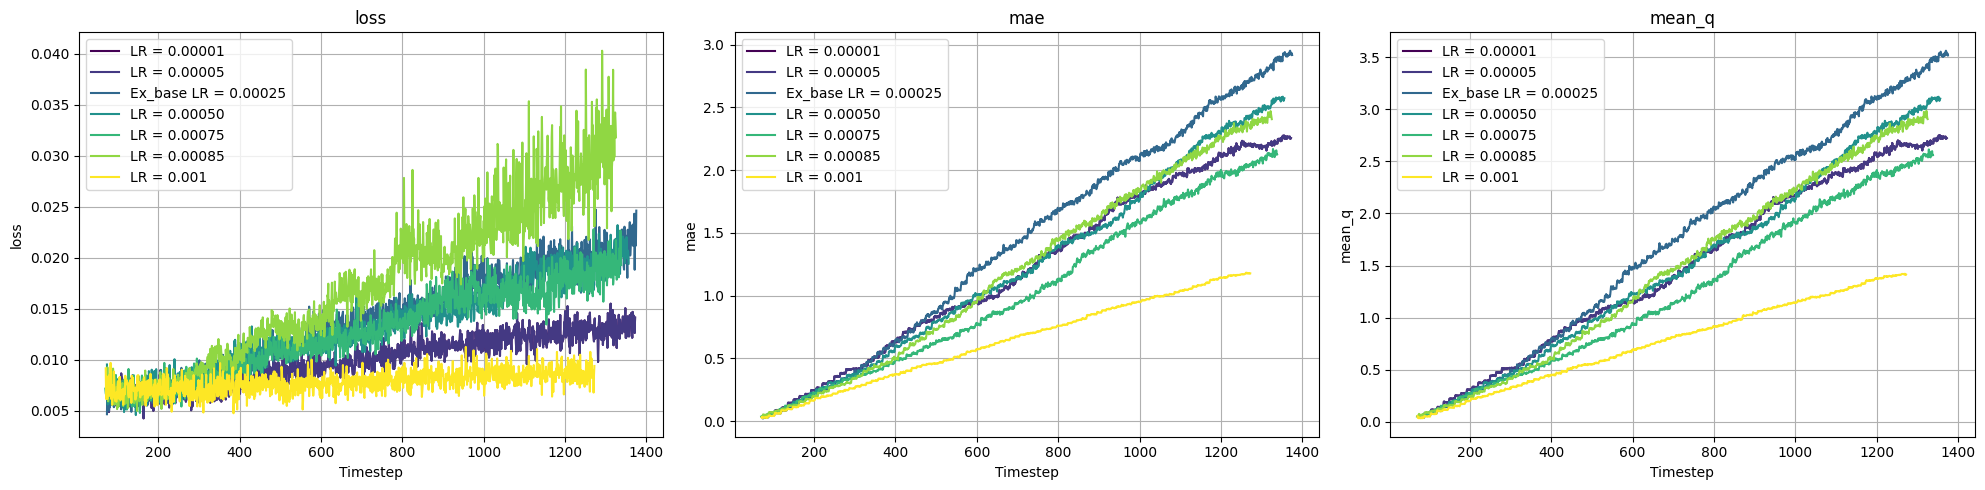

In [29]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "LR = 0.00001": "./Experimento_06_C/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00005": "./Experimento_06_C/dqn_SpaceInvaders-v0_log.json",
    "Ex_base LR = 0.00025": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00050": "./Experimento_02_C/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00075": "./Experimento_03_C/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00085": "./Experimento_04_C/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.001": "./Experimento_05_C/dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

Podemos ver los resultados del LR para un TRAIN_INTERVAL de 24

|                     | EXPERIMENTO BASE | EXPERIMENTO 1   | EXPERIMENTO 2         | EXPERIMENTO 3  | EXPERIMENTO 4  | EXPERIMENTO 5  | EXPERIMENTO 6  | EXPERIMENTO 7   | EXPERIMENTO 8  | EXPERIMENTO 9  |
| ------------------- | ---------------- | --------------- | --------------------- | -------------- | -------------- | -------------- | -------------- | --------------- | -------------- | -------------- |
| INPUT_SHAPE         | (84, 84)         | (84, 84)        | (84, 84)              | (84, 84)       | (84, 84)       | (84, 84)       | (84, 84)       | (84, 84)        | (84, 84)       | (84, 84)       |
| WINDOW_LENGTH       | 4                | 4               | 4                     | 4              | 4              | 4              | 4              | 4               | 4              | 4              |
| LEARNING_RATE       | **0.00025**      | **0.00001**     | **0.00005**           | **0.0001**     | **0.00025**    | **0.00050**    | **0.00075**    | **0.00085**     | **0.0009**     | **0.001**      |
| GAMMA               | 0.99             | 0.99            | 0.99                  | 0.99           | 0.99           | 0.99           | 0.99           | 0.99            | 0.99           | 0.99           |
| TARGET_MODEL_UPDATE | 10000            | 10000           | 10000                 | 10000          | 10000          | 10000          | 10000          | 10000           | 10000          | 10000          |
| TRAIN_INTERVAL      | 4                | 24              | 24                    | 24             | 24             | 24             | 24             | 24              | 24             | 24             |
| DELTA_CLIP          | 1.0              | 1.0             | 1.0                   | 1.0            | 1.0            | 1.0            | 1.0            | 1.0             | 1.0            | 1.0            |
| puntuación de test  | 8 ~ 22 Mean 13.6 | 4 ~ 18 Mean 8.9 | **10 ~ 23 Mean 16.4** | 2 ~ 8 Mean 5.0 | 1 ~ 5 Mean 2.6 | 1 ~ 5 Mean 2.7 | 0 ~ 7 Mean 3.7 | 5 ~ 13 Mean 9.8 | 0 ~ 0 Mean 0.0 | 0 ~ 0 Mean 0.0 |



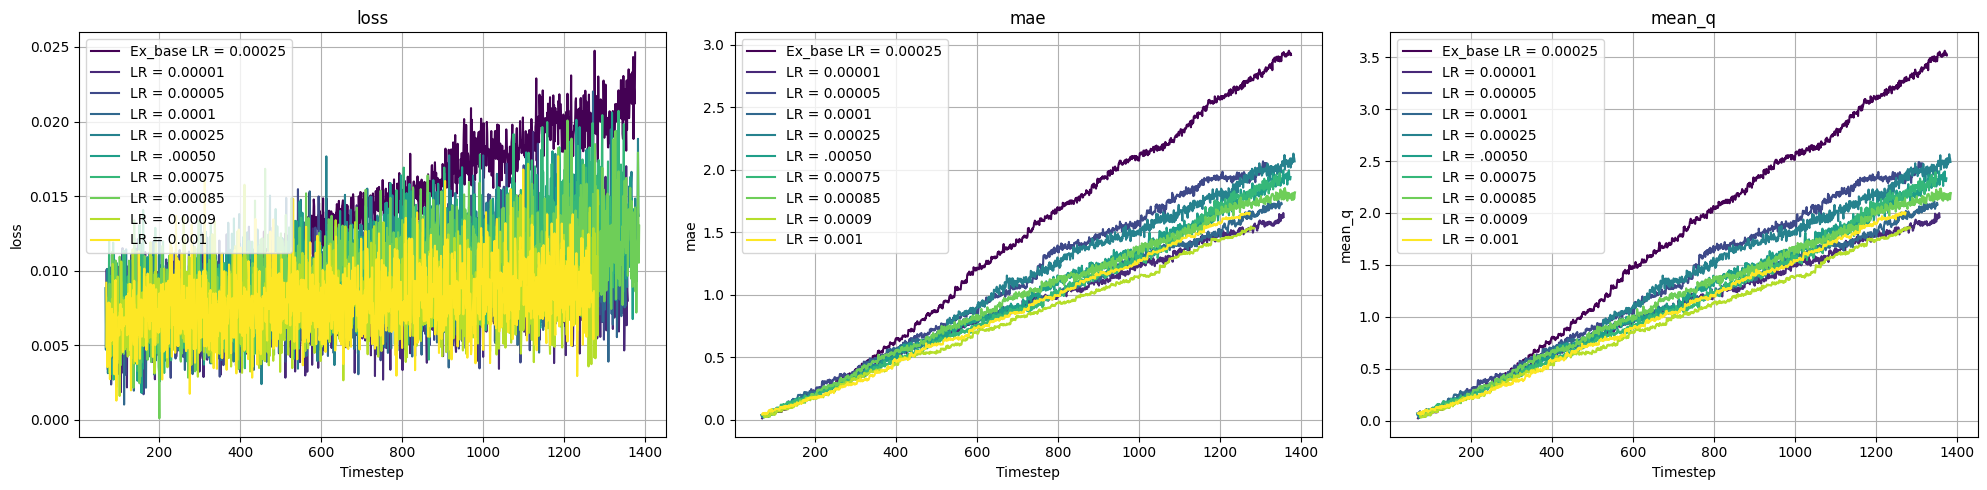

In [32]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "Ex_base LR = 0.00025": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",
    
    "LR = 0.00001": "./Experimento_08_A/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00005": "./Experimento_07_A/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.0001": "./Experimento_09_A/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00025": "./Experimento_01_A/dqn_SpaceInvaders-v0_log.json",
    "LR = .00050": "./Experimento_04_A/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00075": "./Experimento_05_A/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00085": "./Experimento_02_A/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.0009": "./Experimento_06_A/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.001": "./Experimento_03_A/dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

Como se ha comentado en el apartado anterior, se puede observar que en un análisis de learning rate, los experimentos que utilizan un TRAIN_INTERVAL de 24 frente a los de 4 reducen la métrica de loss. Por lo tanto, los experimentos con un intervalo de 24 serán más adecuados para seleccionar el valor óptimo de learning rate.

Por otro lado, hay que tener en cuenta la relación directa entre las métricas de MAE y mean_q. Debido a esto, no es recomendable elegir los valores de learning rate que maximizan o minimizan los valores de las métricas. Se observa que un valor intermedio de learning rate de 0.00025 puede ser el más adecuado para nuestro modelo.

## GAMMA

El hiperparámetro "GAMMA" es el factor de descuento para las recompensas futuras. Controla cuánto peso se le da a las recompensas futuras en comparación con las inmediatas. Valores muy altos dan mayor importancia a las recompensas estimadas frente a las actuales; por el contrario, si disminuimos ese valor, daremos mayor importancia a las recompensas inmediatas.

Podemos ver los resultados del GAMMA para un TRAIN_INTERVAL de 4

|                     | EXPERIMENTO 1    | EXPERIMENTO 2     | EXPERIMENTO 3    | EXPERIMENTO 4   | EXPERIMENTO 5    | EXPERIMENTO 6         | EXPERIMENTO 7  | EXPERIMENTO BASE |
| ------------------- | ---------------- | ----------------- | ---------------- | --------------- | ---------------- | --------------------- | -------------- | ---------------- |
| INPUT_SHAPE         | (84, 84)         | (84, 84)          | (84, 84)         | (84, 84)        | (84, 84)         | (84, 84)              | (84, 84)       | (84, 84)         |
| WINDOW_LENGTH       | 4                | 4                 | 4                | 4               | 4                | 4                     | 4              | 4                |
| LEARNING_RATE       | 0.00025          | 0.00025           | 0.00025          | 0.00025         | 0.00025          | 0.00025               | 0.00025        | 0.00025          |
| GAMMA               | **0.01**         | **0.50**          | **0.75**         | **0.85**        | **0.95**         | **0.97**              | **0.98**       | **0.99**         |
| TARGET_MODEL_UPDATE | 10000            | 10000             | 10000            | 10000           | 10000            | 10000                 | 10000          | 10000            |
| TRAIN_INTERVAL      | 4                | 4                 | 4                | 4               | 4                | 4                     | 4              | 4                |
| DELTA_CLIP          | 1.0              | 1.0               | 1.0              | 1.0             | 1.0              | 1.0                   | 1.0            | 1.0              |
| puntuación de test  | 6 ~ 25 Mean 13.2 | 10 ~ 16 Mean 11.8 | 6 ~ 18 Mean 10.3 | 4 ~ 13 Mean 9.0 | 4 ~ 21 Mean 12.2 | **12 ~ 30 Mean 19.8** | 1 ~ 7 Mean 3.4 | 8 ~ 22 Mean 13.6 |

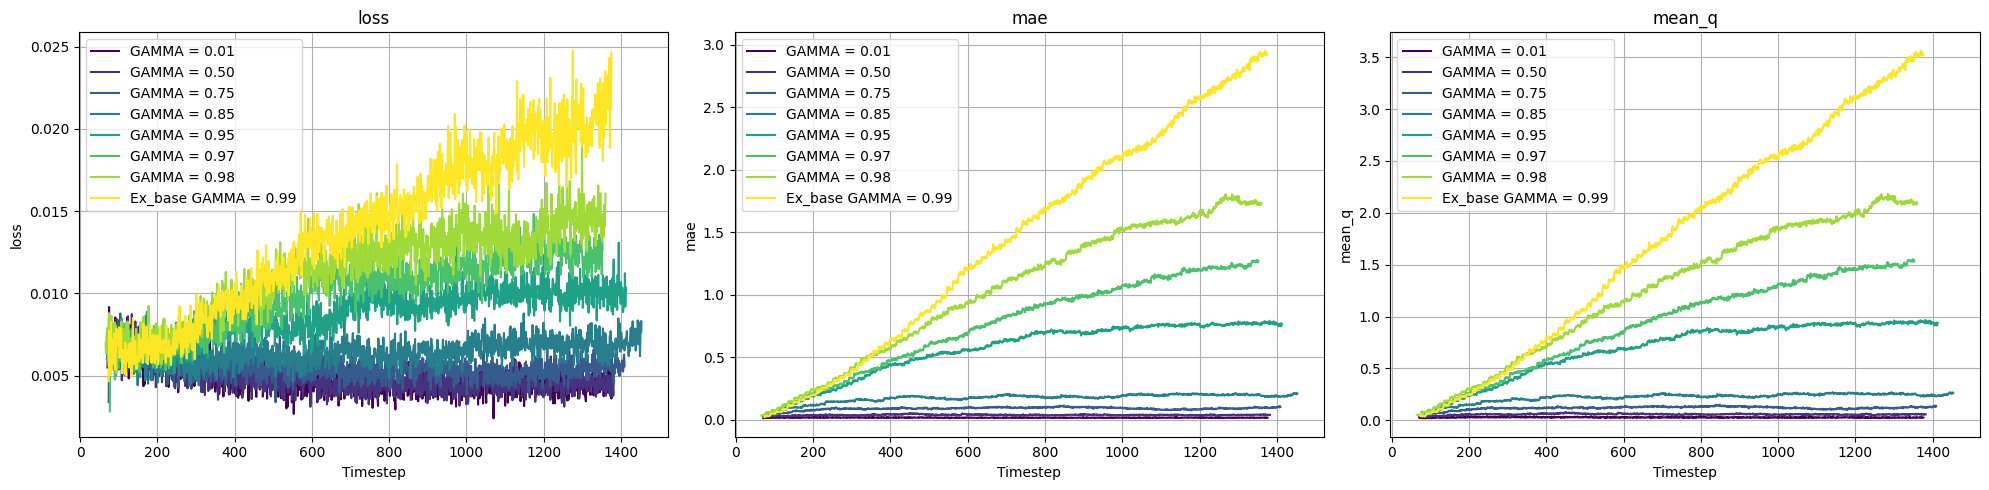

In [35]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {  
    "GAMMA = 0.01": "./Experimento_02_B/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.50": "./Experimento_03_B/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.75": "./Experimento_04_B/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.85": "./Experimento_05_B/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.95": "./Experimento_06_B/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.97": "./Experimento_07_B/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.98": "./Experimento_08_B/dqn_SpaceInvaders-v0_log.json",
    "Ex_base GAMMA = 0.99": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

Podemos ver los resultados del GAMMA para un TRAIN_INTERVAL de 24

|                     | EXPERIMENTO BASE | EXPERIMENTO 1     | EXPERIMENTO 2    | EXPERIMENTO 3   | EXPERIMENTO 4   | EXPERIMENTO 5        | EXPERIMENTO 6    | EXPERIMENTO 7  |
| ------------------- | ---------------- | ----------------- | ---------------- | --------------- | --------------- | -------------------- | ---------------- | -------------- |
| INPUT_SHAPE         | (84, 84)         | (84, 84)          | (84, 84)         | (84, 84)        | (84, 84)        | (84, 84)             | (84, 84)         | (84, 84)       |
| WINDOW_LENGTH       | 4                | 4                 | 4                | 4               | 4               | 4                    | 4                | 4              |
| LEARNING_RATE       | 0.00025          | 0.00025           | 0.00025          | 0.00025         | 0.00025         | 0.00025              | 0.00025          | 0.00025        |
| GAMMA               | **0.99**         | **0.01**          | **0.50**         | **0.75**        | **0.95**        | **0.97**             | **0.98**         | **0.99**       |
| TARGET_MODEL_UPDATE | 10000            | 10000             | 10000            | 10000           | 10000           | 10000                | 10000            | 10000          |
| TRAIN_INTERVAL      | 4                | **24**            | **24**           | **24**          | **24**          | **24**               | **24**           | **24**         |
| DELTA_CLIP          | 1.0              | 1.0               | 1.0              | 1.0             | 1.0             | 1.0                  | 1.0              | 1.0            |
| puntuación de test  | 8 ~ 22 Mean 13.6 | 11 ~ 18 Mean 13.5 | 5 ~ 26 Mean 14.9 | 4 ~ 17 Mean 9.4 | 0 ~ 19 Mean 9.4 | **8 ~ 29 Mean 17.4** | 6 ~ 17 Mean 13.5 | 1 ~ 5 Mean 2.6 |

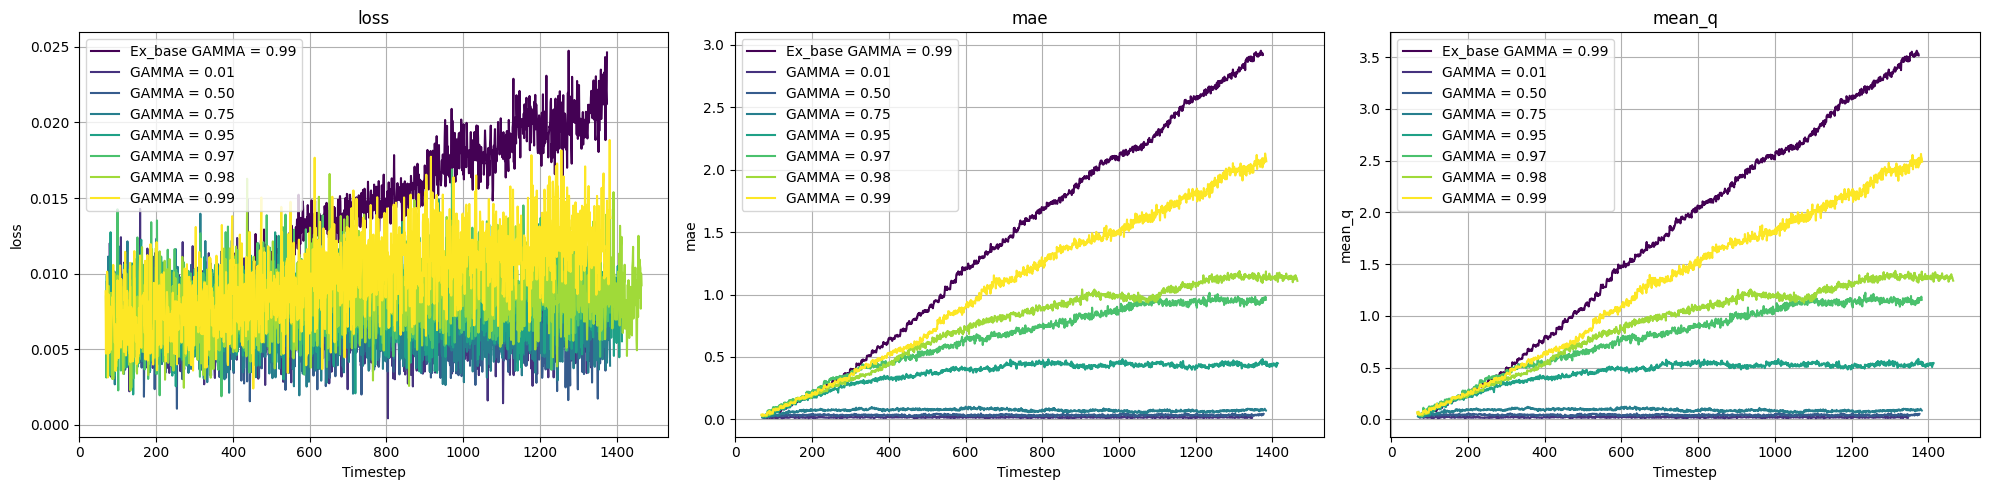

In [36]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "Ex_base GAMMA = 0.99": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.01": "./Experimento_10_A/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.50": "./Experimento_11_A/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.75": "./Experimento_12_A/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.95": "./Experimento_13_A/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.97": "./Experimento_14_A/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.98": "./Experimento_15_A/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.99": "./Experimento_01_A/dqn_SpaceInvaders-v0_log.json",
    
}
plot_experiments_json(experiments, fields_to_plot)

Al finalizar los experimentos se puede observar una clara influencia del hiperparámetro GAMMA en los resultados del modelo.

Los experimentos que utilizan un TRAIN_INTERVAL de 24 frente a los de 4 reducen la métrica de loss y del error mae pero sin embargo tienen un mejor desempeño de mean_q. Este comportamiento es similar el experimentado en el análisis del learning rate, por lo que siguiendo una estrategia similar utilizaremos los experimentos de TRAIN_INTERVAL 24 para analizar el GAMMA.

Dicho esto podemos observar que valores más altos de GAMMA minimizan la métrica de loss y maximizan el mean_q a costa de aumentar también el mae. En contraposición se puede observar que valores pequeños de GAMMA (menores de 0.95) no son adecuados para el modelo ya que su mean_q está muy próxima a 0.

Para valores de GAMMA comprendidos entre 0.95 y 0.99 se pueden extraer las siguientes conclusiones:
- No se aprecia gran influencia en la métrica de loss entre experimentos ya que existe una gran variabilidad.
- Con respecto a mean_q  se observan dos grupos diferenciados:
    - El experimento con valor 0.99 maximiza el valor de mean_q pero también lo hace con el valor mae.
    - Los experimentos con valor 0.97 y 0.98 se encuentran muy próximos entre sí con un valor de mean_q comprendido entre 1.0 y 1.5.
    - El experimento con valor 0.95 tiene un desempeño peor ya que su valor de mean_q es de 0.5.
 
Teniendo esto en cuenta podemos decir que un valor de GAMMA entre 0.97 y 0.99 es el correcto para el modelo.

## TARGET_MODEL_UPDATE

El "TARGET_MODEL_UPDATE" determina la frecuencia con la que se actualiza nuestra red objetivo. DQN utiliza dos redes para el aprendizaje. En nuestros experimentos, usamos la misma arquitectura de red que se actualiza en intervalos diferentes. La red Q es nuestra red principal, que se actualiza cada 4 o 24 pasos según el experimento. Esta red estima la recompensa esperada de tomar una acción "a" en un estado "s". Por otro lado, tenemos la "Red target", que permanece congelada durante las iteraciones marcadas por el "TARGET_MODEL_UPDATE" para proporcionar el objetivo del entrenamiento.

Como sabemos, una actualización muy frecuente en la "Red target" provoca inestabilidades en el entrenamiento, ya que el objetivo varía casi al mismo tiempo que la estimación, haciendo imposible que el modelo converja correctamente. Experimentalmente, podemos comprobar cómo valores reducidos de TMU (10 y 100) provocan inestabilidades que conducen a que se disparen de manera abrupta las gráficas del loss, mae y meanQ, y por consiguiente, sus recompensas pueden llegar a valores de 0, ya que el modelo es incapaz de converger.

Podemos ver los resultados del TARGET_MODEL_UPDATE para un TRAIN_INTERVAL de 4

|                     | EXPERIMENTO 1  | EXPERIMENTO 2     | EXPERIMENTO 3        | EXPERIMENTO BASE | EXPERIMENTO 4    |
| ------------------- | -------------- | ----------------- | -------------------- | ---------------- | ---------------- |
| INPUT_SHAPE         | (84, 84)       | (84, 84)          | (84, 84)             | (84, 84)         | (84, 84)         |
| WINDOW_LENGTH       | 4              | 4                 | 4                    | 4                | 4                |
| LEARNING_RATE       | 0.00025        | 0.00025           | 0.00025              | 0.00025          | 0.00025          |
| GAMMA               | 0.99           | 0.99              | 0.99                 | 0.99             | 0.99             |
| TARGET_MODEL_UPDATE | **10**         | **100**           | **1000**             | **10000**        | **100000**       |
| TRAIN_INTERVAL      | 4              | 4                 | 4                    | 4                | 4                |
| DELTA_CLIP          | 1.0            | 1.0               | 1.0                  | 1.0              | 1.0              |
| puntuación de test  | 0 ~ 0 Mean 0.0 | 11 ~ 19 Mean 13.2 | **9 ~ 24 Mean 14.5** | 8 ~ 22 Mean 13.6 | 5 ~ 21 Mean 12.8 |

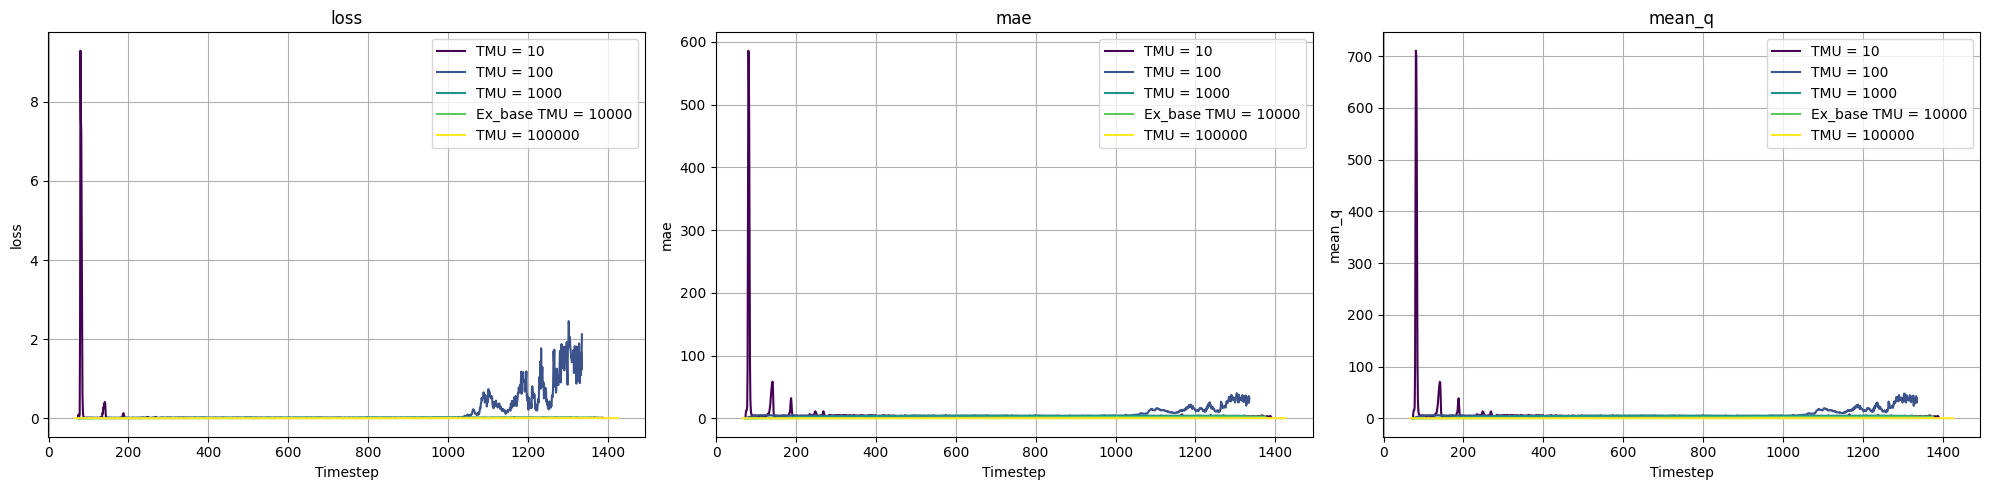

In [37]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "TMU = 10": "./Experimento_04/dqn_SpaceInvaders-v0_log.json",
    "TMU = 100": "./Experimento_03/dqn_SpaceInvaders-v0_log.json",
    "TMU = 1000": "./Experimento_02/dqn_SpaceInvaders-v0_log.json",
    "Ex_base TMU = 10000": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",
    "TMU = 100000": "./Experimento_05/dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

Realizando una breve explicación para cada experimento, nos encontramos con lo siguiente:

- **Experimento Base (TARGET_MODEL_UPDATE: 10,000):** </br>
  Este experimento sirve como referencia, ya que utiliza el valor por defecto de TARGET_MODEL_UPDATE. La variación de la puntuación de test indica que el rendimiento del algoritmo es variable.

- **Experimento 1 (TARGET_MODEL_UPDATE: 10):** </br>
  Reducir el TARGET_MODEL_UPDATE a 10 provoca un colapso del rendimiento del algoritmo. La puntuación de test es nula, lo que indica que el modelo no está aprendiendo. Este resultado muestra que una actualización extremadamente frecuente del modelo objetivo impide que el algoritmo explore la recompensa a largo plazo de manera efectiva.

- **Experimento 2 (TARGET_MODEL_UPDATE: 100):** </br>
  Al aumentar el TARGET_MODEL_UPDATE a 100, observamos un ligero incremento en la puntuación media de test respecto al caso anterior, pero se queda por debajo de los experimentos posteriores. Esto indica que una actualización muy frecuente del modelo objetivo puede ser perjudicial para el rendimiento.

- **Experimento 3 (TARGET_MODEL_UPDATE: 1,000):** </br>
  Al reducir el TARGET_MODEL_UPDATE a 1,000 con respecto al experimento base, observamos una ligera mejora en la puntuación media de test. Podemos inferir que una actualización más frecuente del modelo objetivo puede ayudar a estabilizar el proceso de aprendizaje y, por tanto, mejorar el rendimiento.

- **Experimento 4 (TARGET_MODEL_UPDATE: 100,000):** </br>
  Al aumentar el TARGET_MODEL_UPDATE a 100,000, se observa una ligera disminución en la puntuación media de test respecto al Experimento 2.

Con la información de estos experimentos, observamos que los valores que proporcionarán mejores resultados para el parámetro TARGET_MODEL_UPDATE se encuentran entre 1,000 y 10,000.

Si eliminamos los experimentos con comportamiento explosivo, podemos ver cómo afectan los diferentes valores de TMU a las métricas de Loss, MAE y MeanQ.

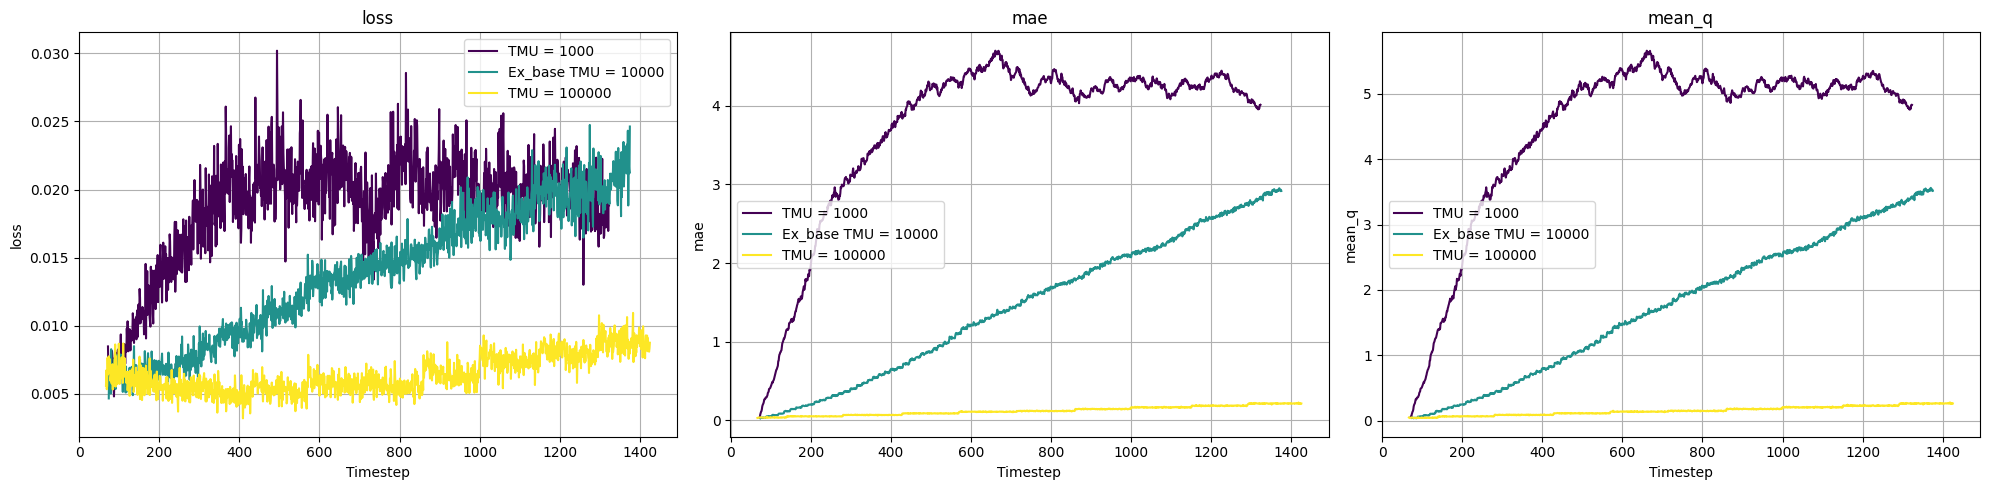

In [38]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "TMU = 1000": "./Experimento_02/dqn_SpaceInvaders-v0_log.json",
    "Ex_base TMU = 10000": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",
    "TMU = 100000": "./Experimento_05/dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

En esta gráfica, podemos observar lo siguiente:

- **Para valor TMU = 1,000:** </br>
  En este caso, obtenemos una pérdida que aumenta muy rápidamente, una MAE que sigue un patrón parecido a la pérdida, creciendo rápidamente y manteniendo cierta estabilidad con una componente variable a partir de etapas intermedias. En el caso de la mean_q, vemos reflejada esa variabilidad a partir de etapas intermedias, lo que indica inestabilidad en las estimaciones de Q. Es un experimento en el que se vislumbra cierta inestabilidad.

- **Para valor TMU = 10,000 (Experimento base):** </br>
  Este caso avanza con mayor estabilidad que el anterior, sin presentar una variabilidad tan marcada como con TMU = 1,000. Podemos determinar que este experimento tiene un componente de rendimiento bastante estable.

- **Para valor TMU = 100,000:** </br>
  Este experimento es el más estable de los tres presentados en este apartado. Aunque no alcanza los resultados de los otros experimentos debido a las actualizaciones menos frecuentes, se puede inferir que, con un número grande de steps, podría llegar a proporcionar buenos resultados en las etapas finales del entrenamiento, ofreciendo una pérdida menor que los otros dos experimentos.

Podemos ver los resultados del TARGET_MODEL_UPDATE para un TRAIN_INTERVAL de 24

|                     | EXPERIMENTO BASE | EXPERIMENTO 1  | EXPERIMENTO 2  | EXPERIMENTO 3        | EXPERIMENTO 4    |
| ------------------- | ---------------- | -------------- | -------------- | -------------------- | ---------------- |
| INPUT_SHAPE         | (84, 84)         | (84, 84)       | (84, 84)       | (84, 84)             | (84, 84)         |
| WINDOW_LENGTH       | 4                | 4              | 4              | 4                    | 4                |
| LEARNING_RATE       | 0.00025          | 0.00025        | 0.00025        | 0.00025              | 0.00025          |
| GAMMA               | 0.99             | 0.99           | 0.99           | 0.99                 | 0.99             |
| TARGET_MODEL_UPDATE | **10000**        | **10**         | **100**        | **1000**             | **100000**       |
| TRAIN_INTERVAL      | 4                | 24             | 24             | 24                   | 24               |
| DELTA_CLIP          | 1.0              | 1.0            | 1.0            | 1.0                  | 1.0              |
| puntuación de test  | 8 ~ 22 Mean 13.6 | 0 ~ 1 Mean 0.8 | 0 ~ 0 Mean 0.0 | **9 ~ 25 Mean 16.6** | 3 ~ 28 Mean 14.5 |

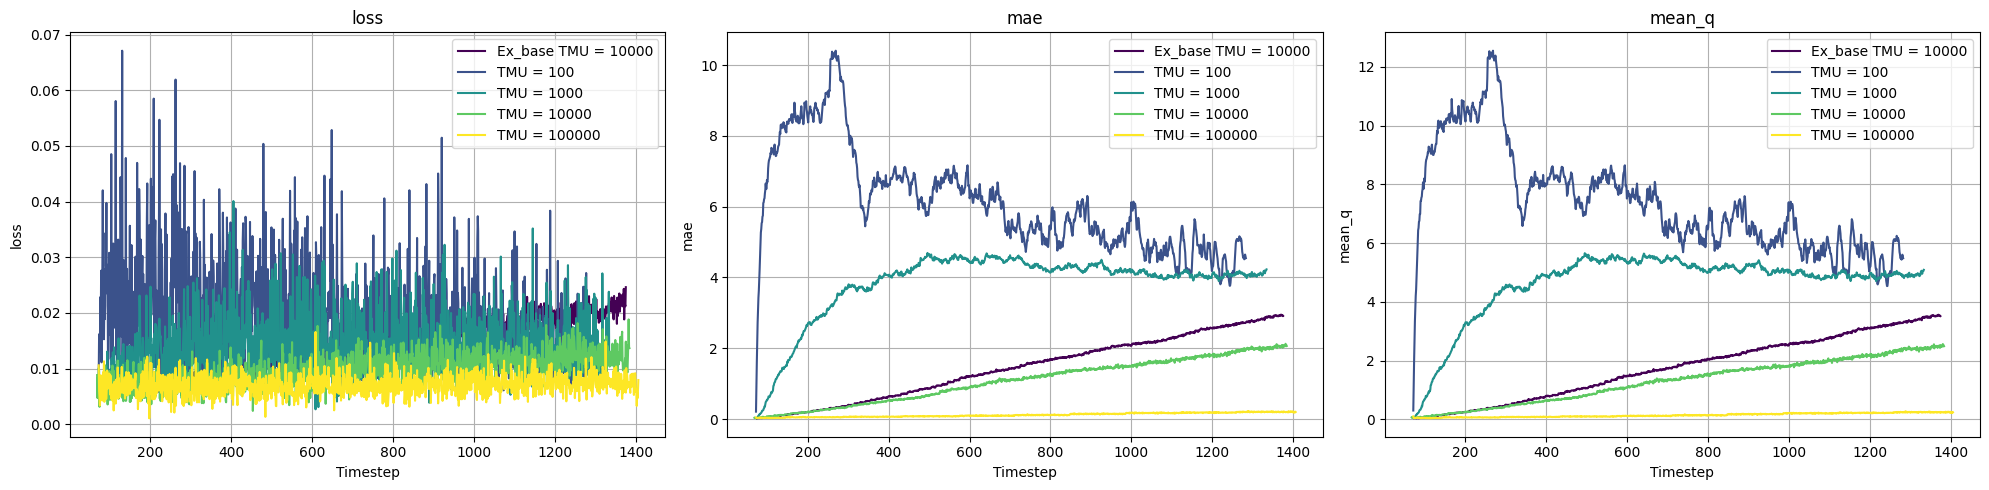

In [42]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "Ex_base TMU = 10000": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",
    "TMU = 100": "./Experimento_17_A/dqn_SpaceInvaders-v0_log.json",
    "TMU = 1000": "./Experimento_18_A/dqn_SpaceInvaders-v0_log.json",
    "TMU = 10000": "./Experimento_01_A/dqn_SpaceInvaders-v0_log.json",
    "TMU = 100000": "./Experimento_19_A/dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

En esta gráfica, podemos observar que al comparar los resultados con un TRAIN_INTERVAL de 24, se obtienen resultados muy parecidos (la MAE y la mean_q para TMU = 1,000 con TRAIN_INTERVAL = 4 y 24), llegando a valores muy similares.

Como era de esperar, a medida que aumentamos el valor del TMU, se pierde esa parte de variabilidad, pero se necesita más tiempo de ejecución (mayor número de pasos) para llegar a mejores resultados. Con valores menores de TMU, se alcanzan resultados antes, pero de una forma más errática.

Cabe destacar en esta gráfica la comparativa entre el experimento base (TMU = 10,000 y TRAIN_INTERVAL = 4) y el Experimento 4 (mismo TMU pero TRAIN_INTERVAL = 24). En las gráficas se ratifica que aumentando el TRAIN_INTERVAL obtenemos peores resultados. Sin embargo, al aplicar la parte de test, vemos que en promedio, el Experimento 4 tiene resultados algo mejores. Esto no implica nada taxativamente, ya que los resultados de mismos entrenamientos no aportan los mismos resultados, como veremos en la siguiente sección.

## Incertidumbre de los entrenamientos

Durante la realización de los experimentos, hemos llegado a repetir algunos de ellos. Esta repetición nos ha dado lugar a resultados diferentes, algo curioso pero que tiene su explicación. Debido al proceso de exploración aleatorio, el modelo toma acciones diferentes en cada uno de los experimentos, lo que lleva a que se desarrollen estrategias distintas. A esto se suma que, en el proceso de aprendizaje, se seleccionan un conjunto de estrategias pasadas escogidas al azar directamente de la memoria, lo que nuevamente lleva al desarrollo de estrategias ligeramente diferentes para cada experimento.

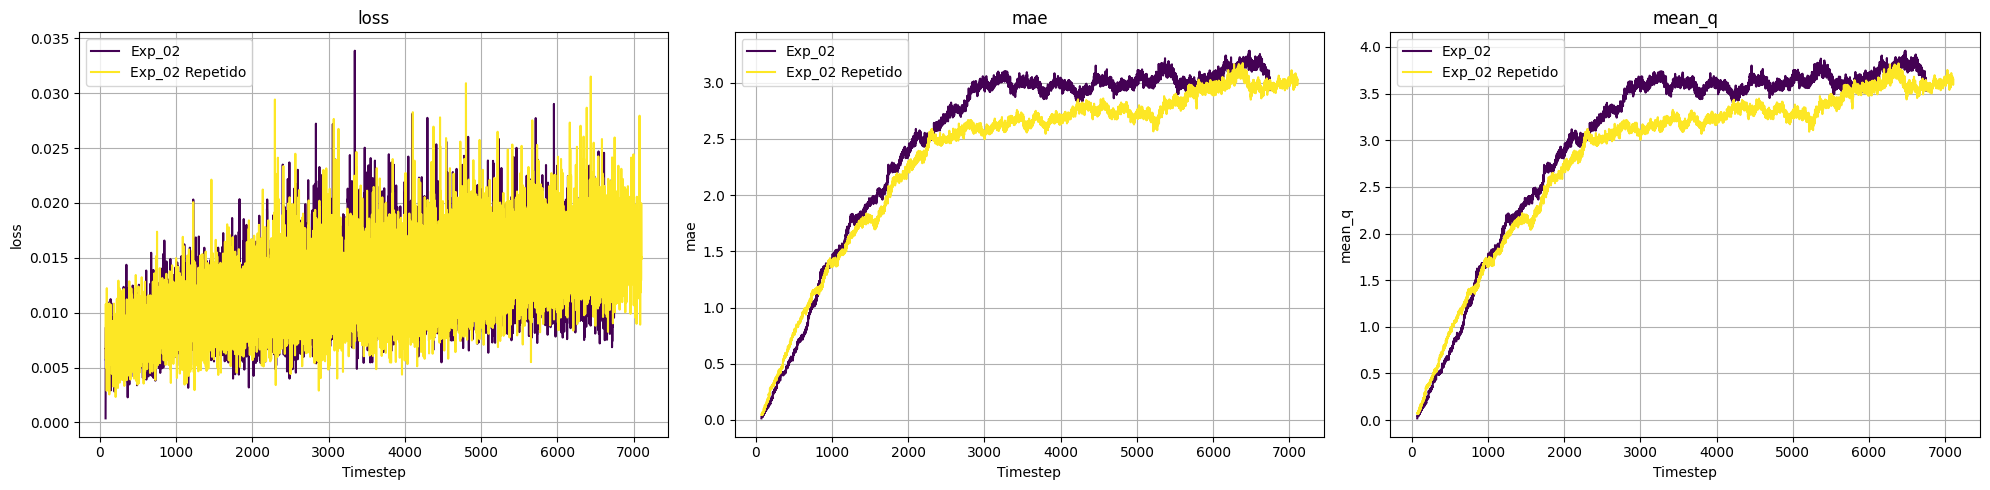

In [46]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "Exp_02": "./Exp_02/EXPERIMENTO_02.json",
    "Exp_02 Repetido": "./Exp_02_old/EXPERIMENTO_02.json",
}
plot_experiments_json(experiments, fields_to_plot)

Se puede observar que, efectivamente, ambos experimentos siguen una tendencia parecida, pero no igual. Esto lleva a que los resultados de ambos experimentos sean diferentes, ya que la estrategia seguida no es la misma.

|                    | EXPERIMENTO       | EXPERIMENTO REPETIDO |
| ------------------ | ----------------- | -------------------- |
| puntuación de test | 16 ~ 28 Mean 20.3 | 13 ~ 26 Mean 18.5    |

## Efecto de entrenar mas tiempo

Una vez realizados los experimentos variando individualmente los hiperparámetros, seleccionamos aquellos que nos dan una puntuación mayor y cuyas curvas visiblemente no han llegado a una estabilidad, es decir, aquellas que tienen una tendencia de crecimiento. Aumentando el número de iteraciones de entrenamiento, buscamos alcanzar esos estancamientos que previsiblemente nos llevarán a puntuaciones más altas. Por otro lado, hemos recombinado los hiperparámetros para ver cómo afecta al resultado final. A priori, los resultados de la mezcla no tienen por qué mejorar las respuestas de nuestros modelos, puesto que la modificación de hiperparámetros no influye de manera excluyente, sino que se influyen mutuamente. 
Experimentalmente, podemos verificar que, efectivamente, aplicar esa mezcla de hiperparámetros no conduce siempre a mejores resultados.



|                     | EXPERIMENTO 1 BASE | EXPERIMENTO 2     | EXPERIMENTO 3     | EXPERIMENTO 4     | EXPERIMENTO 5     | EXPERIMENTO 6    | EXPERIMENTO 7     | EXPERIMENTO 8    |
| ------------------- | ------------------ | ----------------- | ----------------- | ----------------- | ----------------- | ---------------- | ----------------- | ---------------- |
| INPUT_SHAPE         | (84, 84)           | (84, 84)          | (84, 84)          | (84, 84)          | (84, 84)          | (84, 84)         | (84, 84)          | (84, 84)         |
| WINDOW_LENGTH       | 4                  | 4                 | 4                 | 4                 | 4                 | 4                | 4                 | 4                |
| LEARNING_RATE       | 0.00025            | **0.00005**       | 0.00025           | 0.00025           | **0.00005**       | **0.00005**      | 0.00025           | **0.00005**      |
| GAMMA               | 0.99               | 0.99              | **0.97**          | 0.99              | **0.97**          | 0.99             | **0.97**          | **0.97**         |
| TARGET_MODEL_UPDATE | 10000              | 10000             | 10000             | **1000**          | 10000             | **1000**         | **1000**          | **1000**         |
| TRAIN_INTERVAL      | 4                  | **24**            | **24**            | **24**            | **24**            | **24**           | **24**            | **24**           |
| DELTA_CLIP          | 1.0                | 1.0               | 1.0               | 1.0               | 1.0               | 1.0              | 1.0               | 1.0              |
| STEPS               | 5.000.000          | 5.000.000         | 5.000.000         | 5.000.000         | 5.000.000         | 5.000.000        | 5.000.000         | 5.000.000        |
| puntuación de test  | 11 ~ 29 Mean 21.4  | 16 ~ 28 Mean 20.3 | 13 ~ 34 Mean 24.6 | 10 ~ 26 Mean 16.0 | 12 ~ 35 Mean 21.1 | 6 ~ 35 Mean 17.0 | 16 ~ 33 Mean 23.4 | 8 ~ 21 Mean 14.1 |


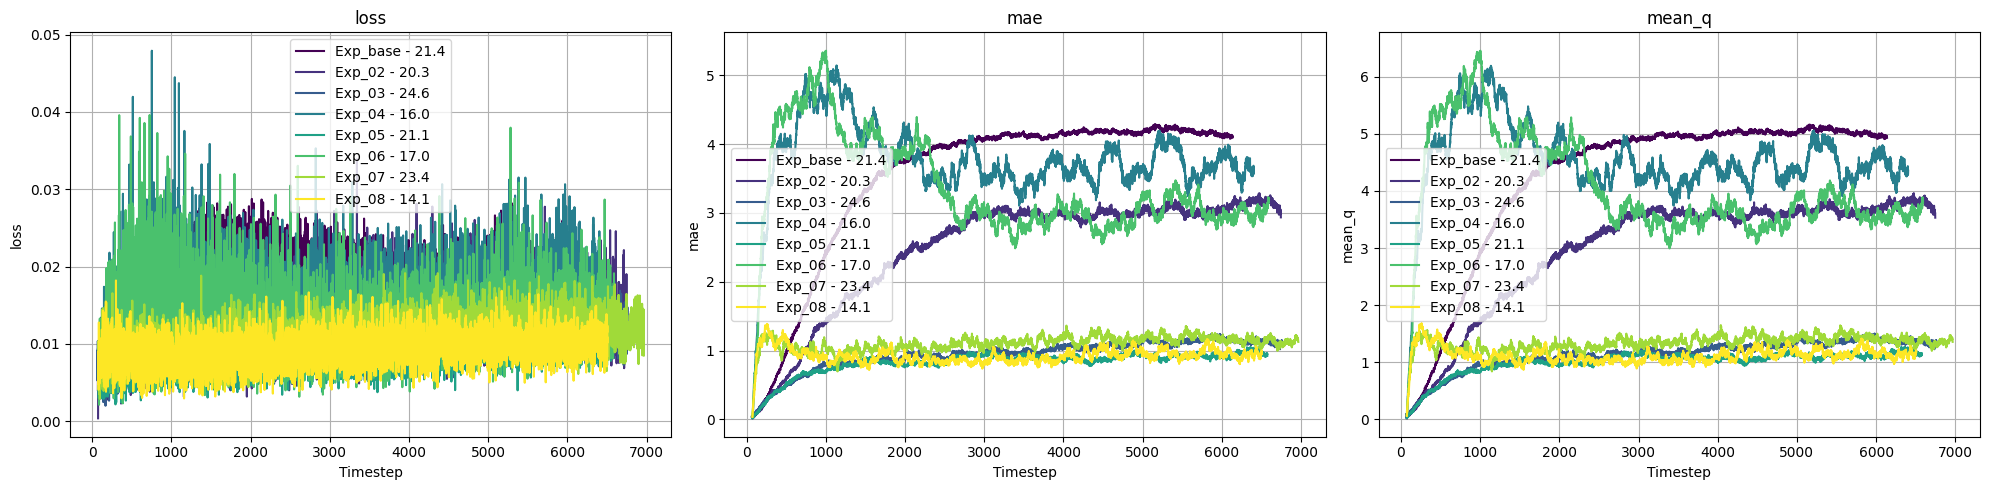

In [43]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "Exp_base - 21.4": "./Experimento_base/dqn_SpaceInvaders-v0_log.json",
    "Exp_02 - 20.3": "./Exp_02/EXPERIMENTO_02.json",
    "Exp_03 - 24.6": "./Exp_03/EXPERIMENTO_03.json",
    "Exp_04 - 16.0": "./Exp_04/EXPERIMENTO_04.json",
    "Exp_05 - 21.1": "./Exp_05/EXPERIMENTO_05.json",
    "Exp_06 - 17.0": "./Exp_06/EXPERIMENTO_06.json",
    "Exp_07 - 23.4": "./Exp_07/EXPERIMENTO_07.json",
    "Exp_08 - 14.1": "./Exp_08/EXPERIMENTO_08.json",
}
plot_experiments_json(experiments, fields_to_plot)

En los experimentos realizados, se observaron diferencias claras en la estabilidad y variabilidad de los modelos. En experimentos como los 2, 3 y 5, se evidenció una tendencia estable con una disminución constante en el MAE y la pérdida, lo que indica un aprendizaje consistente y convergente. En contraste, experimentos como los 4 y 6 mostraron una mayor variabilidad en el MAE y la pérdida, sugiriendo inestabilidad y la posible necesidad de más tiempo de entrenamiento para alcanzar la estabilización.

Al analizar la tendencia de crecimiento en las métricas de desempeño, se identificaron experimentos que, aunque no habían alcanzado la estabilidad, mostraban un crecimiento continuo, lo cual indica que el agente sigue aprendiendo activamente. Aumentar el tiempo de entrenamiento en estos casos puede llevar a una mejora significativa en el rendimiento, permitiendo que los modelos exploren más y ajusten sus políticas de manera más efectiva.

Entrenar más tiempo ayuda a los modelos a alcanzar la convergencia, especialmente en aquellos experimentos con alta variabilidad. Esto permite un mejor equilibrio entre exploración y explotación, reduciendo la variabilidad inicial y mejorando el rendimiento a largo plazo. Además, prolongar el entrenamiento permite una evaluación más completa de la efectividad de las combinaciones de hiperparámetros, identificando aquellas que realmente optimizan el rendimiento del agente.